# Notebook I - Climate Regime
<hr>
This module performs climate data analysis and compiling general agro-climatic indicators. These general agro-climatic indicators summarize climatic profiles in the study area for each grid. The key input data for this module is the climatic data, and the geographical and terrain data.

Prepared by Geoinformatics Center, AIT
<hr>


In [ ]:
import psutil
# psutil.virtual_memory()

psutil.virtual_memory().free/1E9

Now, we will import the specific Python packages we need for PyAEZ.

In [1]:
'''import supporting libraries'''
import numpy as np
import matplotlib.pyplot as plt
# import numpy as np
import os
try:
    from osgeo import gdal
except:
    import gdal
import sys

from time import time as timer

import xarray as xr
import rioxarray as rio

# import psutil
# from dask.distributed import Client,LocalCluster
# import graphviz

In [2]:
# branch version tag
revname='v21pv'

# # HPC Orion
# # Replace with path to your PyAEZ folder under your username
# work_dir = '/work/hpc/users/kerrie/UN_FAO/repos/PyAEZ/pyaez2.1_vectorize/'
# # Replace with whatever location you want to output data under your username
# out_path = '/work/hpc/users/kerrie/UN_FAO/pyaez_results/china_8110/'+revname+'/' 
# # these are the same for everyone on HPC Orion
# data_dir = '/work/hpc/datasets/un_fao/pyaez/china_8110/daily/npy/'
# maskfile = '/work/hpc/datasets/un_fao/pyaez/china_static/netcdf/mask.nc'
# elevfile = '/work/hpc/datasets/un_fao/pyaez/china_static/tif/elev.tif'


# # Kerrie desktop
# work_dir = 'K:/projects/unfao/pyaez_gaez/repos/PyAEZ_kerrie/PyAEZ/pyaez2.1_parvec/' # path to your PyAEZ repo
# out_path = work_dir+'NB1outputs/' # path for saving output data
# data_dir = 'C://Users/kerrie.WIN/Documents/data/pyAEZ_data_inputs_china_03272023/npy/' # path to your data
# maskfile = 'C://Users/kerrie.WIN/Documents/data/pyAEZ_data_inputs_china_03272023/tif/mask.tif'# subset for no antarctica, 1800 lats
# elevfile = 'C://Users/kerrie.WIN/Documents/data/pyAEZ_data_inputs_china_03272023/tif/elev.tif'

# work_dir = 'K:/projects/unfao/pyaez_gaez/repos/PyAEZ_kerrie/PyAEZ/pyaez2.1_parvec/' # path to your PyAEZ repo
# out_path = work_dir+'NB1outputs/' # path for saving output data
# data_dir = 'C://Users/kerrie.WIN/Documents/data/pyAEZ_data_inputs_global_NOTPRODUCTION/npy/' # path to your data
# maskfile = 'C://Users/kerrie.WIN/Documents/data/pyAEZ_data_inputs_global_NOTPRODUCTION/tif/mask_2268708_5m.tif'# subset for no antarctica, 1800 lats
# elevfile = 'C://Users/kerrie.WIN/Documents/data/pyAEZ_data_inputs_global_NOTPRODUCTION/tif/Elevation_2268708_5m.tif'


# # Kerrie laptop china
work_dir = 'C://Users/kerrie/Documents/01_LocalCode/repos/PyAEZ/pyaez2.1_parvec/' # path to your PyAEZ repo
out_path = work_dir+'NB1outputs/' # path for saving output data
# data_dir = 'C://Users/kerrie/Documents/02_LocalData/pyAEZ_input_data/china/npy/' # path to your data
# maskfile = 'C://Users/kerrie/Documents/02_LocalData/pyAEZ_input_data/china/tif/mask.tif'# subset for no antarctica, 1800 lats
# elevfile = 'C://Users/kerrie/Documents/02_LocalData/pyAEZ_input_data/china/tif/elev.tif'
data_dir = 'C://Users/kerrie/Documents/02_LocalData/pyAEZ_input_data/15GB/' # path to your data
maskfile = 'C://Users/kerrie/Documents/02_LocalData/pyAEZ_input_data/15GB/mask.tif'# subset for no antarctica, 1800 lats
elevfile = 'C://Users/kerrie/Documents/02_LocalData/pyAEZ_input_data/15GB/elev.tif'

# # Kerrie laptop global
# work_dir = 'C://Users/kerrie/Documents/01_LocalCode/repos/PyAEZ/pyaez2.1_parvec/' # path to your PyAEZ repo
# out_path = work_dir+'NB1outputs/' # path for saving output data
# data_dir = 'C://Users/kerrie/Documents/02_LocalData/pyAEZ_input_data/global_NOTPRODUCTION/npy/' # path to your data
# maskfile = 'C://Users/kerrie/Documents/02_LocalData/pyAEZ_input_data/global_NOTPRODUCTION/tif/mask_2268708_5m.tif'# subset for no antarctica, 1800 lats
# elevfile = 'C://Users/kerrie/Documents/02_LocalData/pyAEZ_input_data/global_NOTPRODUCTION/tif/Elevation_2268708_5m.tif'

# Check whether the specified path exists or not
isExist = os.path.exists(out_path)
if not isExist:
   # Create a new directory because it does not exist
   os.makedirs(out_path)
   print("The new directory is created!")

dir_toplev='C://Users/kerrie/Documents/01_LocalCode/'
daskpath=os.path.join(dir_toplev, "dask-worker-space-can-be-deleted")

isExist = os.path.exists(daskpath)
if not isExist:
   os.mkdir(daskpath)
   print("dask worker directory created")

In [3]:
# %load_ext autoreload
# %autoreload 2
# Import Module 1 and initate Class intance
# from pyaez import ClimateRegime
# clim_reg = ClimateRegime.ClimateRegime()

# # Importing UtilitiesCalc
# from pyaez import UtilitiesCalc
# obj_util = UtilitiesCalc.UtilitiesCalc()
sys.path.append(work_dir)
# import ClimateRegime_v21pv as ClimateRegime
# import ClimateRegime_test as ClimateRegime
import ClimateRegime_loopchunks as ClimateRegime
clim_reg = ClimateRegime.ClimateRegime()

# import UtilitiesCalc_v21pv as UtilitiesCalc
import UtilitiesCalc_test as UtilitiesCalc
obj_utilities=UtilitiesCalc.UtilitiesCalc()


# import UtilitiesCalc_v21pv as UtilitiesCalc
import LGPCalc_loopchunks as LGPCalc


In [4]:
# # cluster=LocalCluster(n_workers=1, threads_per_worker=20)#, memory_limit='10GB')
# # client=Client(cluster)
# client=Client()
# client

In [5]:
# expect 2 seconds run time for china
# expect s run time for global

# DATA INFORMATION
daily = True         # Type of climate data. True: daily, False: monthly
parallel=True# False## flag for dask parallel processing (for speed). True: use dask. False: no dask, only numpy
mask_value = 0       # pixel value in admin_mask to exclude from the analysis

if parallel:
    import dask.array as da
    import dask

start=timer()

# If parallel=True, load the inputs as lazy dask arrays, data type float32 
max_temp = da.from_npy_stack(data_dir+'Tmax-2m365/').astype('float32')  # maximum temperature
min_temp = da.from_npy_stack(data_dir+'Tmin-2m365/').astype('float32')  # minimum temperature
precipitation = da.from_npy_stack(data_dir+'Precip365/').astype('float32')  # precipitation
rel_humidity = da.from_npy_stack(data_dir+'Rhum365/').astype('float32')  # relative humidity
wind_speed = da.from_npy_stack(data_dir+'Wind-2m365/').astype('float32') # wind speed measured at two meters
short_rad = da.from_npy_stack(data_dir+'Srad365/').astype('float32')  # shortwave radiation
mask=da.from_array(gdal.Open(maskfile).ReadAsArray())
elevation=da.from_array(gdal.Open(elevfile).ReadAsArray())

# # If parallel=False, load the inputs as numpy arrays, data type float32 
# max_temp = np.load(data_dir+'Tmax-2m365/0.npy').astype('float32')  # maximum temperature
# min_temp = np.load(data_dir+'Tmin-2m365/0.npy').astype('float32')  # minimum temperature
# precipitation = np.load(data_dir+'Precip365/0.npy').astype('float32')  # precipitation
# rel_humidity = np.load(data_dir+'Rhum365/0.npy').astype('float32')  # relative humidity
# wind_speed = np.load(data_dir+'Wind-2m365/0.npy').astype('float32') # wind speed measured at two meters
# short_rad = np.load(data_dir+'Srad365/0.npy').astype('float32')  # shortwave radiation
# mask=gdal.Open(maskfile).ReadAsArray()
# elevation=gdal.Open(elevfile).ReadAsArray()

print(min_temp.shape,mask.shape)
print((max_temp.nbytes+min_temp.nbytes+precipitation.nbytes+rel_humidity.nbytes+wind_speed.nbytes+short_rad.nbytes+mask.nbytes+elevation.nbytes)/1E9,'GB total input data')

task_time=timer()-start
task_time

(1800, 950, 365) (1800, 950)
14.99328 GB total input data


c:\Users\kerrie\.conda\envs\pyaez_dask\Lib\site-packages\osgeo\gdal.py:287: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


0.0364842414855957

In [6]:
# Define the Area-Of-Interest's geographical extents

# if lat_min/lat_max values defined below are located at pixel center --> set lat_centers to True 
# if they are located at the exterior pixel edge --> set lat_centers to False
lat_centers=True 

# provide min and max latitudes (either set manually or read from a data file)
# lat_min = 18.04167
# lat_max = 53.625
lats=rio.open_rasterio(maskfile)['y'].data   # get array of latitudes from maskfile
lat_min = np.trunc(lats.min()*100000)/100000 # min lat value at pixel center, limit precision to 5 decimal places
lat_max = np.trunc(lats.max()*100000)/100000 # max lat value at pixel center, limit precision 5 decimal places



### Loading the imported data into the Object Class ('*clim_reg*' Class)

In [7]:
# expect >1s run time for china

# For parallel=True, this sets the chunk size based on the amount of available RAM and CPU threads
# There are 2 possible user overrides: 
# 1) instead of accepting the default chunk size, the user can enter the total number of 
# chunks desired in order to increase or decrease the chunk size. Although, choosing very 
# large chunks may cause the notebook to fail due to lack of available memory.
# 2) The user can indicate they want to use less RAM for the computation with reduce_mem_used=True, 
# which sets a smaller chunk size that allows the computations to proceed using less than x GB RAM

# For parallel=False, this sets all parameters associated with chunking to None

start=timer()

clim_reg.setParallel(max_temp,parallel)#,nchunks=288,reduce_mem_used=True)

task_time=timer()-start
print(clim_reg.__dict__.keys())
print(clim_reg.nchunks, clim_reg.chunk3D, clim_reg.chunksize3D_MB)
print('time:',task_time)

dict_keys(['parallel', 'chunk2D', 'chunk3D', 'chunksize3D_MB', 'nchunks'])
34 (-1, 28, -1) 73.584
time: 0.003983497619628906


In [8]:
# expect >1s run time for china

# For parallel=True, this chunks clim_reg.im_mask

start=timer()

clim_reg.setStudyAreaMask(mask, mask_value)

task_time=timer()-start
print(clim_reg.__dict__.keys())
print('time:',task_time)

dict_keys(['parallel', 'chunk2D', 'chunk3D', 'chunksize3D_MB', 'nchunks', 'im_mask', 'nodata_val', 'set_mask'])
time: 0.0


In [9]:
# expect >1s run time for china

# Added functionality includes identifying whether the lat_min lat_max given
# are located at pixel centers or exterior edges. The function now takes this 
# into account when generating a 2D latitude map.

# For parallel=True, this chunks clim_reg.latitude and clim_reg.elevation

start=timer()

clim_reg.setLocationTerrainData(lat_min, lat_max, lat_centers, elevation) #KLG

task_time=timer()-start
print(clim_reg.__dict__.keys())
print('time:',task_time)


dict_keys(['parallel', 'chunk2D', 'chunk3D', 'chunksize3D_MB', 'nchunks', 'im_mask', 'nodata_val', 'set_mask', 'elevation', 'im_height', 'im_width', 'latitude'])
time: 0.001993417739868164


In [10]:
# parallel=True; for global expect ~8.5min (laptop), ~11.5min (desktop) run time
# parallel=True; for china expect x (laptop), ~24s (desktop) run time
# parallel=False; for china

# For parallel=True, this chunks all input variables and attaches to clim_reg as lazy dask arrays which aren't held in RAM
# It computes the following as numpy arrays saved in RAM: pet_daily, meanT_monthly_sealevel, P_by_PET_monthly, 
# meanT_monthly, totalPrec_monthly, annual_Tmean, annual_accPrec, annual_accPET
# Everything else remains a dask array to be loaded and computed later when needed.

start=timer()

clim_reg.setDailyClimateData(min_temp, max_temp, precipitation, short_rad, wind_speed, rel_humidity)

task_time=timer()-start
print(clim_reg.__dict__.keys())
print('time:',task_time)

dict_keys(['parallel', 'chunk2D', 'chunk3D', 'chunksize3D_MB', 'nchunks', 'im_mask', 'nodata_val', 'set_mask', 'elevation', 'im_height', 'im_width', 'latitude', 'doy_start', 'doy_end', 'set_monthly', 'pet_daily', 'meanT_daily', 'meanT_monthly_sealevel', 'P_by_PET_monthly', 'maxT_daily', 'totalPrec_daily', 'meanT_monthly', 'totalPrec_monthly', 'annual_Tmean', 'annual_accPrec', 'annual_accPET'])
time: 59.226306438446045


in ClimateRegime, computing latitude in parallel
setting mask
in ClimateRegime, computing mask in parallel
0.569756269454956


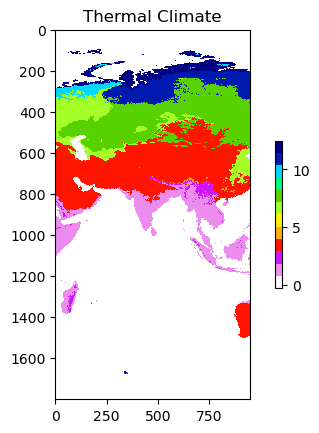

In [11]:
start=timer()

tclimate = clim_reg.getThermalClimate()

task_time=timer()-start
print(task_time)

fig = plt.figure()
plt.imshow(tclimate, cmap=plt.get_cmap('gist_ncar_r', 12),vmin=-0.3,vmax=12.5,interpolation='none')
plt.title('Thermal Climate')
plt.colorbar(shrink=0.4)
plt.show()

in ClimateRegime, computing mask in parallel
0.30509042739868164


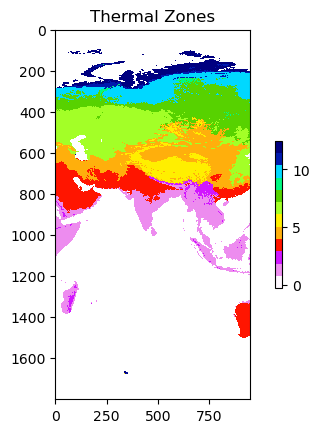

In [12]:
start=timer()

tzone = clim_reg.getThermalZone()

task_time=timer()-start
print(task_time)

fig = plt.figure()
plt.imshow(tzone, cmap=plt.get_cmap('gist_ncar_r', 12),vmin=-0.3,vmax=12.5,interpolation='none')
plt.title('Thermal Zones')
plt.colorbar(shrink=0.4)
plt.show()

in ClimateRegime, computing lgpt0 in parallel
in ClimateRegime, computing lgpt5 in parallel
in ClimateRegime, computing lgpt10 in parallel
6.324142217636108


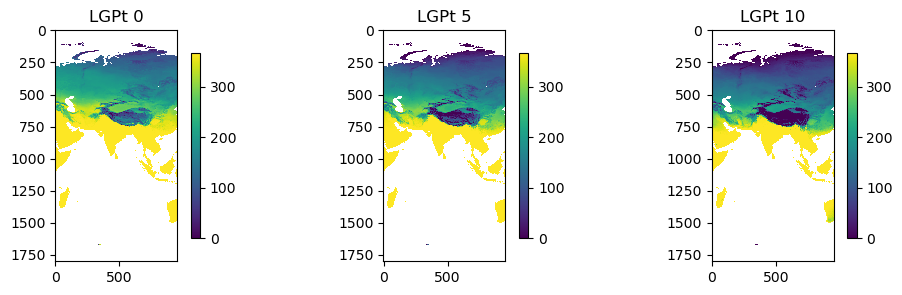

In [13]:
start=timer()

lgpt0 = clim_reg.getThermalLGP0()
lgpt5 = clim_reg.getThermalLGP5()
lgpt10 = clim_reg.getThermalLGP10()

task_time=timer()-start
print(task_time)

plt.figure(figsize=(12,3))
plt.subplot(1, 3, 1)
plt.imshow(lgpt0,vmin=0,vmax=366,interpolation='none')
plt.title('LGPt 0')
plt.colorbar(shrink=0.8)
#----------------------
plt.subplot(1, 3, 2)
plt.imshow(lgpt5, vmin=0, vmax=366,interpolation='none')
plt.title('LGPt 5')
plt.colorbar(shrink=0.8)
#----------------------
plt.subplot(1, 3, 3)
plt.imshow(lgpt10, vmin=0, vmax=366,interpolation='none')
plt.title('LGPt 10')
plt.colorbar(shrink=0.8)
#----------------------
plt.show()

in ClimateRegime, computing tsum0 in parallel
in ClimateRegime, computing tsum5 in parallel
in ClimateRegime, computing tsum10 in parallel
7.19333028793335


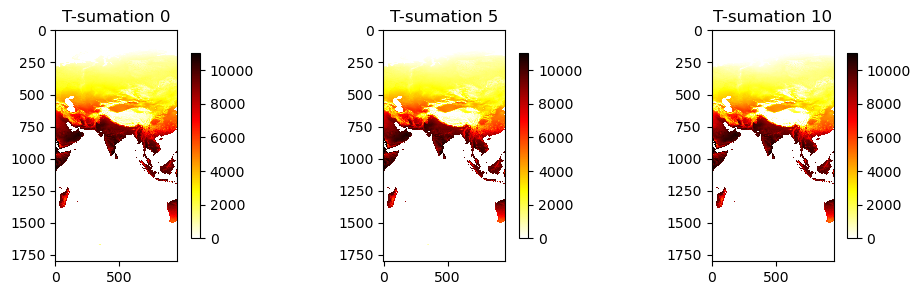

In [14]:
start=timer()

tsum0 = clim_reg.getTemperatureSum0()
tsum5 = clim_reg.getTemperatureSum5()
tsum10 = clim_reg.getTemperatureSum10()

task_time=timer()-start
print(task_time)

plt.figure(figsize=(12,3))
plt.subplot(1, 3, 1)
plt.imshow(tsum0, cmap='hot_r', vmin=0, vmax=11000,interpolation='none')
plt.title('T-sumation 0')
plt.colorbar(shrink=0.8)
#----------------------
plt.subplot(1, 3, 2)
plt.imshow(tsum5, cmap='hot_r', vmin=0, vmax=11000,interpolation='none')
plt.title('T-sumation 5')
plt.colorbar(shrink=0.8)
#----------------------
plt.subplot(1, 3, 3)
plt.imshow(tsum10, cmap='hot_r', vmin=0, vmax=11000,interpolation='none')
plt.title('T-sumation 10')
plt.colorbar(shrink=0.8)
#----------------------
plt.show()

loop 0 of 12 , this message will print every 10 chunks
loop 10 of 12 , this message will print every 10 chunks
144.61787796020508


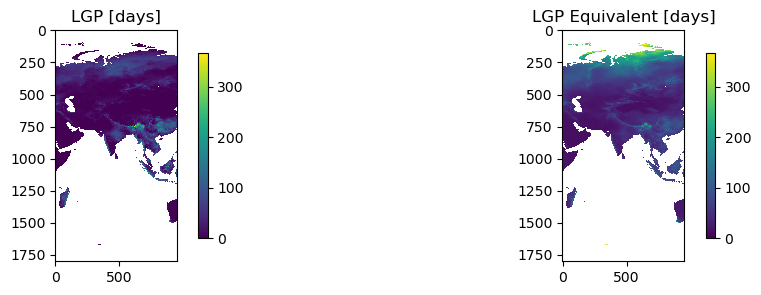

In [15]:
start=timer()

lgp = clim_reg.getLGP(Sa=100., D=1.)
lgp_class = clim_reg.getLGPClassified(lgp)
lgp_equv = clim_reg.getLGPEquivalent()

task_time=timer()-start
print(task_time)

fig = plt.figure(figsize=(12,3))
plt.subplot(121)
plt.imshow(lgp, cmap='viridis', vmin=0, vmax=366,interpolation='none')
plt.title('LGP [days]')
plt.colorbar(shrink=0.8)
plt.subplot(122)
plt.imshow(lgp_equv, cmap='viridis', vmin=0, vmax=366,interpolation='none')
plt.title('LGP Equivalent [days]')
plt.colorbar(shrink=0.8)
plt.show()

In [ ]:
start=timer()

tprofile = clim_reg.getTemperatureProfile()

task_time=timer()-start
print(task_time)

tile_list = ['A1','A2','A3','A4','A5','A6','A7','A8','A9',
            'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9']

fig = plt.figure(figsize=(8, 12))
for i1 in range(1, 19):
    plt.subplot(6, 3, i1)
    plt.imshow(tprofile[i1-1],interpolation='none',vmin=0,vmax=365,cmap='plasma')
    plt.title(tile_list[i1-1])
    plt.colorbar(shrink=0.8)
plt.tight_layout()
plt.show()

In [ ]:
start=timer()

multi_crop = clim_reg.getMultiCroppingZones(tclimate, lgp, lgpt5, lgpt10, tsum0, tsum10)
multi_crop_rainfed = multi_crop[0]  # for rainfed conditions
multi_crop_irr = multi_crop[1]  # for irrigated conditions

task_time=timer()-start
print(task_time)

fig = plt.figure()
plt.imshow(multi_crop_irr, cmap=plt.get_cmap('gist_ncar_r', 9), vmin=-0.2, vmax=8.4,interpolation='none')
plt.title('Multi Cropping Zone - IRR')
plt.colorbar()
plt.show()

fig = plt.figure()
plt.imshow(multi_crop_rainfed,cmap=plt.get_cmap('gist_ncar_r', 9), vmin=-0.2, vmax=8.4,interpolation='none')
plt.title('Multi Cropping Zone - RAINFED')
plt.colorbar()
plt.show()

In [ ]:
start=timer()

permafrost_eval = clim_reg.AirFrostIndexandPermafrostEvaluation()
frost_index = permafrost_eval[0]
permafrost = permafrost_eval[1]

task_time=timer()-start
print(task_time)

fig = plt.figure()
plt.imshow(frost_index, cmap=plt.get_cmap('tab20b', 11), vmin=-0.05, vmax=1.05,interpolation='none')
plt.title('Frost Index')
plt.colorbar()
plt.show()

fig = plt.figure()
plt.imshow(permafrost, cmap=plt.get_cmap('tab20b', 5), vmin=-0.5, vmax=4.3,interpolation='none')
plt.title('Permafrost Evaluation')
plt.colorbar()
plt.show()

In [ ]:
start=timer()

tzone_fallow = clim_reg.TZoneFallowRequirement(tzone)

task_time=timer()-start
print(task_time)

fig = plt.figure()
plt.imshow(tzone_fallow, cmap=plt.get_cmap('tab10', 7), vmin=-0.5, vmax=6.3,interpolation='none')
plt.title('Fallow Requirement')
plt.colorbar()
plt.show()

In [ ]:
# check dtypes of all outputs
outputs=[tclimate,tzone,lgpt0,lgpt5,lgpt10,tsum0,tsum5,tsum10,tprofile,lgp,lgp_class,lgp_equv,multi_crop_rainfed,multi_crop_irr,frost_index,permafrost,tzone_fallow]
dtypes=[]
for var in outputs:
    # for arrays
    try:
        dt=var.dtype
        dtypes.append(dt)
    # for lists of arrays
    except:
        for v in var:
            dt=v.dtype
            dtypes.append(dt)

print(dtypes)

### Agro-ecological zones classification
The agro-ecological zones (AEZ) methodology provides a framework for establishing a spatial inventory of land resources compiled from global/national environmental data sets and assembled to quantify multiple spatial characteristics required for the assessments of land productivity under location-specific agro-ecological conditions.

In [ ]:
# can't run until we have the global soil_terrain_lulc

# expect ~ minutes run time for global
start=timer()

aez = clim_reg.AEZClassification(
    tclimate, lgp, lgp_equv, lgpt5, soil_terrain_lulc, permafrost)

task_time=timer()-start
task_time

In [ ]:
# now visualizing result
fig = plt.figure(dpi=600)
plt.imshow(aez, cmap=plt.get_cmap('rainbow', 59), vmin=0, vmax=59,interpolation=None)
plt.title('Agro-ecological Zonation')
plt.colorbar()
plt.savefig(out_path+"aez_"+revname+".png",bbox_inches="tight", dpi=600)
plt.show()


<hr>

### END OF MODULE 1: CLIMATE REGIME

<hr>